# Purpose of this notebook
This is a notebook that makes Fig. 2 of the paper.


In [21]:
# Some IPython magic to make it easier to read the outputs 
%matplotlib inline
%autoreload 2

In [26]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Import all the required libraries 

In [17]:
import astropy
import h5py
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

# my own modules 
import calculate_astrophy_quantities as cal_astrophy
import extract_catalog as ext_cat
import plot_clst_prop as plot_clst

In [5]:
total_clstNo = 129
h5File = \
    "../../data/" + \
    "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5"

f = h5py.File(h5File, "r")

groupMass = f["Group"]["GroupMass"][:]
groupMcrit200 = f["Group"]["Group_M_Crit200"][:]
groupMcrit500 = f["Group"]["Group_M_Crit500"][:]

y_legend = [r"$M_{\rm FoF}$", r"$M_{200c}$", r"$M_{500c}$"]
x_label = r"$M_{Cluster}(M_{\odot})$"
y_label = r"$N(> M_{Cluster})$"

clst_df_list = \
    map(lambda x: ext_cat.extract_clst(f, x), 
        range(total_clstNo))

# Lay out the grids for subplots

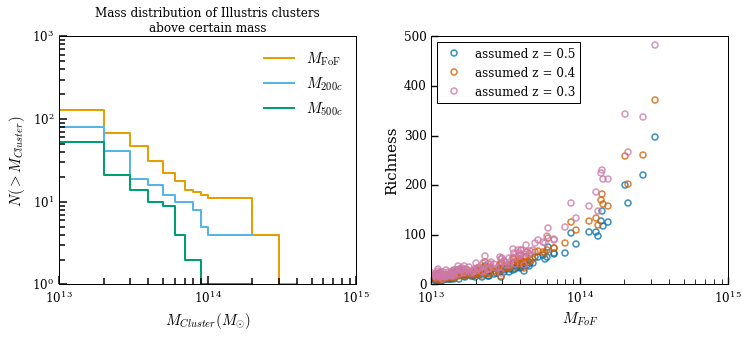

In [9]:
fig_path = "../../paper/figures/"
spaces = 0.25
figside = 10
plt.figure(figsize=(figside * 1.2, figside))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], 
                       height_ratios=[1, 1])
gs.update(hspace=spaces, wspace=spaces)

grid_location = ((0, 0), (0, 1))  # , (1, 1))
axes = {g: plt.subplot(gs[g[0], g[1]]) 
        for g in grid_location}

for ax in axes.values():
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
plot_clst.plot_cluster_mass_distribution(
    groupMass, groupMcrit200, groupMcrit500, y_legend,
    x_label, y_label, ax=axes[(0, 0)], save=False)

richness_prop_cycle = plt.rcParams["axes.prop_cycle"][3:6]
richness, mask = \
    plot_clst.plot_mass_vs_richness(
        np.array(groupMass[:total_clstNo]) * 1e10, 
        clst_df_list, show=True, ax=axes[(0, 1)],
        prop_cycler=richness_prop_cycle)

# print richness_prop_cycle
# hist_ax = axes[(1, 1)]
# for z in richness.keys():
#     # hist_ax.set_prop_cycle(richness_prop_cycle)
#     hist_ax.hist(richness[z], bins=30, range=(50, 450), alpha=0.3)
#     hist_ax.set_xlabel("Richness")
plt.savefig(fig_path + 'clusterMassDist.eps', bbox_inches='tight')

# Examine what remains after the cut

In [11]:
z_ranges = np.arange(0.1, 0.6, 0.05)

In [22]:
Illustris_cosmology = cal_astrophy.get_Illustris_cosmology()

In [23]:
limiting_mag_list = map(lambda z:
    cal_astrophy.dimmest_mag_for_illustris_halos_to_be_observable(
    astropy_cosmo=Illustris_cosmology, z=z), z_ranges
)


In [24]:
clsters = {}
for z in richness.keys():
    clsters[z] = np.sum(np.array(richness[z]) > 50)

In [25]:
clsters

{0.3: 43, 0.4: 28, 0.5: 23}

# Find out if cluster IDs of clusters with observable richness > 50

In [36]:
np.arange(0, len(richness[0.3]))[np.array(richness[0.3]) > 50]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 39, 40, 46, 48, 51, 58])